In [6]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plot
from sklearn.datasets import fetch_mldata
import sklearn.datasets as sk_data

%matplotlib inline 
mnist = fetch_mldata('MNIST original', data_home=sk_data.get_data_home())
print mnist.data.shape

def vectorize_y(Y):
    v_y = np.zeros((Y.shape[0], max(set(Y.flatten()))+1))
    print v_y.shape
    for i in range(len(Y)):
        v_y[i][Y[i]] = 1.0
    return v_y


(70000, 784)


In [7]:
SPLIT_1 = 0.5
SPLIT_2 = 0.75

def shuffle(X, Y):
    Y = np.array([Y.flatten()]).T
    A = np.concatenate((X, Y),axis=1)
    np.random.shuffle(A)
    print A.shape
    X_prime, Y_prime = np.hsplit(A, [-1])
    if (set(Y_prime.flatten())!=set([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])):
        return shuffle(X,Y)
    return X_prime, Y_prime


XX, YY = shuffle(mnist.data, mnist.target)
train_xx, test_xx = np.vsplit(XX, [len(mnist.data)*SPLIT_1])
train_yy, test_yy = np.array_split(YY, [len(mnist.data)*SPLIT_1])

train_x, test_x = np.vsplit(train_xx, [len(train_xx)*SPLIT_2])
train_y, test_y = np.array_split(train_yy, [len(train_yy)*SPLIT_2])

print train_x.shape
print test_x.shape
print train_y.shape
print test_y.shape

(70000, 785)
(26250, 784)
(8750, 784)
(26250, 1)
(8750, 1)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA


In [ ]:
## SKLearn's Support Vector Machine

# model = RandomForestClassifier()
# model.fit(train_x, train_y)
# y_prime = model.predict(test_x)

# pipeline = Pipeline([('pca', PCA()), ('estimator', LinearSVC())])
# param_grid = [
#     {
#         'pca': [PCA()]
#     }
# ]
# model = GridSearchCV(pipeline, cv=2, param_grid=param_grid)
# model.fit(train_x, train_y)
# y_prime = model.predict(test_x)


pca = PCA(svd_solver='randomized',whiten=True).fit(train_x)
pca_train_x = pca.transform(train_x)
pca_test_x = pca.transform(test_x)
model = LinearSVC()
model.fit(train_x, train_y)
y_prime = model.predict(test_x)

acc = accuracy_score(y_prime, test_y)
print acc

In [9]:
# Neural Network 2 Layers. 
import time
from collections import defaultdict
t0 = time.time()
mlp = MLPClassifier(hidden_layer_sizes = (784,784), activation='relu')
mlp.fit(train_x, train_y)
print "training: %.3f s"%(time.time()-t0)
t0 = time.time()
y_prime = mlp.predict(test_x)
print "predicting: %.3f s"%(time.time()-t0)

print accuracy_score(y_prime, test_y)

m = defaultdict(list)
for i in range(len(test_x)):
    if (len(m[y_prime[i]]) < 5):
        m[y_prime[i]].append(test_x[i])
    





training: 139.863 s
predicting: 1.216 s
0.951085714286


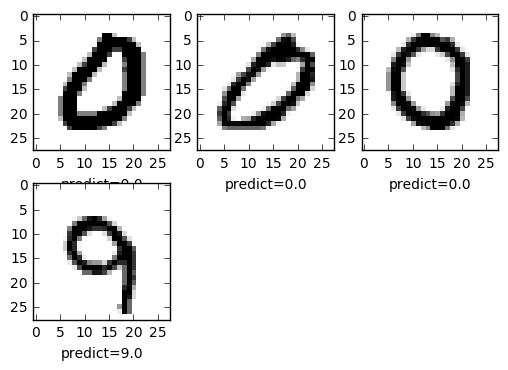

In [24]:
i = 1
for k,v in m.iteritems():
    for hot_v in v:
        plot.subplot(np.ceil(2), 3, i)
        plot.imshow(hot_v.reshape((28,28)), cmap=plot.cm.gray_r, interpolation='nearest')
        plot.xlabel("predict=%s"%k)
        if (i>3): break
        i+=1


<class 'sklearn.datasets.base.Bunch'>
(70000, 784)
(70000,)
(28, 28)


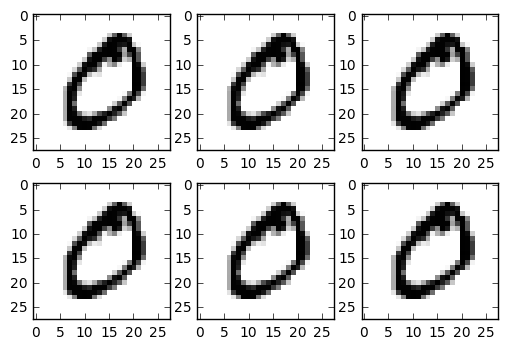

In [13]:
print type(mnist)
print mnist.data.shape
print mnist.target.shape
img = mnist.data[0].reshape((28,28))
img2 = mnist.data[1].reshape((28,28))
print img.shape
plot.subplot(2, 3, 1)
plot.imshow(img, cmap=plot.cm.gray_r, interpolation='nearest')
plot.subplot(2, 3, 2)
plot.imshow(img, cmap=plot.cm.gray_r, interpolation='nearest')
plot.subplot(2, 3, 3)
plot.imshow(img, cmap=plot.cm.gray_r, interpolation='nearest')
plot.subplot(2, 3, 4)
plot.imshow(img, cmap=plot.cm.gray_r, interpolation='nearest')
plot.subplot(2, 3, 5)
plot.imshow(img, cmap=plot.cm.gray_r, interpolation='nearest')
plot.subplot(2, 3, 6)
plot.imshow(img, cmap=plot.cm.gray_r, interpolation='nearest')
plot.subplot(2, 3, 1)
plot.imshow(img, cmap=plot.cm.gray_r, interpolation='nearest')
plot.subplot(2, 3, 2)
plot.imshow(img, cmap=plot.cm.gray_r, interpolation='nearest')
plot.subplot(2, 3, 3)
plot.imshow(img, cmap=plot.cm.gray_r, interpolation='nearest')
plot.subplot(2, 3, 4)
plot.imshow(img, cmap=plot.cm.gray_r, interpolation='nearest')
plot.subplot(2, 3, 5)
plot.imshow(img, cmap=plot.cm.gray_r, interpolation='nearest')
plot.subplot(2, 3, 6)
plot.imshow(img, cmap=plot.cm.gray_r, interpolation='nearest')



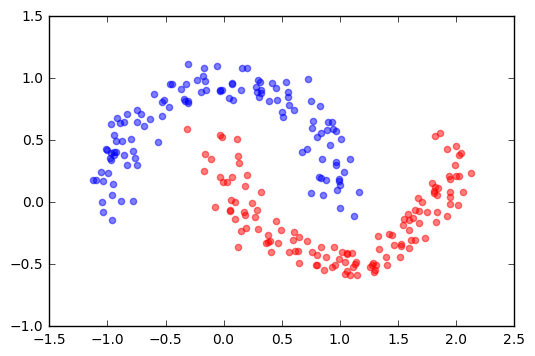

In [14]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500, noise=0.1)
# X,y = make_blobs(centers=2, cluster_std=0.5, n_samples=500)
[x_train, x_test] = np.vsplit(X, [len(X)/2])
[y_train, y_test] = np.vsplit(y.reshape(y.shape[0],1), [len(y)/2])
K = np.hsplit(x_train, [1])

X1 = [K[0][i] for i in range(len(y_train)) if y_train[i]!=0]
X2 = [K[1][i] for i in range(len(y_train)) if y_train[i]!=0]

X3 = [K[0][i] for i in range(len(y_train)) if y_train[i]==0]
X4 = [K[1][i] for i in range(len(y_train)) if y_train[i]==0]

plot.scatter(X1, X2, color='r', alpha=0.5)
plot.scatter(X3, X4, color='b', alpha=0.5)

K2 = np.hsplit(x_test, [1])


(250, 2)
size=2
weight=(2, 10) bias=(1, 10) f=<function _NN__SIGMOID at 0x134342ed8>
size=10
weight=(10, 10) bias=(1, 10) f=<function _NN__SIGMOID at 0x134342ed8>
size=10
weight=(10, 10) bias=(1, 10) f=<function _NN__SIGMOID at 0x134342ed8>
size=10
weight=(10, 10) bias=(1, 10) f=<function _NN__SIGMOID at 0x134342ed8>
size=10
weight=(10, 2) bias=(1, 2) f=<function _NN__SIGMOID at 0x134342ed8>
size=2
epoch 1/2000
epoch 2/2000
epoch 3/2000
epoch 4/2000
epoch 5/2000
epoch 6/2000
epoch 7/2000
epoch 8/2000
epoch 9/2000
epoch 10/2000
epoch 11/2000
epoch 12/2000
epoch 13/2000
epoch 14/2000
epoch 15/2000
epoch 16/2000
epoch 17/2000
epoch 18/2000
epoch 19/2000
epoch 20/2000
epoch 21/2000
epoch 22/2000
epoch 23/2000
epoch 24/2000
epoch 25/2000
epoch 26/2000
epoch 27/2000
epoch 28/2000
epoch 29/2000
epoch 30/2000
epoch 31/2000
epoch 32/2000
epoch 33/2000
epoch 34/2000
epoch 35/2000
epoch 36/2000
epoch 37/2000
epoch 38/2000
epoch 39/2000
epoch 40/2000
epoch 41/2000
epoch 42/2000
epoch 43/2000
epoch

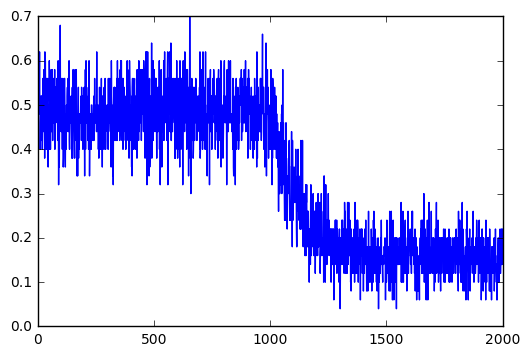

In [17]:
from sklearn.linear_model import LogisticRegression
import NN
from NN import NN
from sklearn.metrics import accuracy_score
from NN import shuffle

# model = LogisticRegression()
# model.fit(x_train, y_train)
# y_hat = model.predict(x_test)

vec_y_train = vectorize_y(y_train)

model = NN(2)
model.addDense(10)
model.addDense(10)
model.addDense(10)
model.addDense(10)
model.addDense(2)
model.summary()
loss_arr=[]
model.fit(x_train, vec_y_train, epoch=2000, n_minibatch=100, loss_arr=loss_arr, verbose=False)
plot.plot(range(len(loss_arr)), loss_arr)
print "LOSS: ", np.mean(loss_arr[-100:])

# X5 = [K2[0][i] for i in range(len(y_hat)) if y_hat[i]!=0]
# X6 = [K2[1][i] for i in range(len(y_hat)) if y_hat[i]!=0]

# X7 = [K2[0][i] for i in range(len(y_hat)) if y_hat[i]==0]
# X8 = [K2[1][i] for i in range(len(y_hat)) if y_hat[i]==0]

# plot.scatter(X5, X6, color='r', alpha=0.5)
# plot.scatter(X7, X8, color='b', alpha=0.5)
# plot.scatter(X1, X2, color='r', alpha=0.5)
# plot.scatter(X3, X4, color='b', alpha=0.5)

# print "ACC:", accuracy_score(y_hat, y_test)


ACC: 0.832


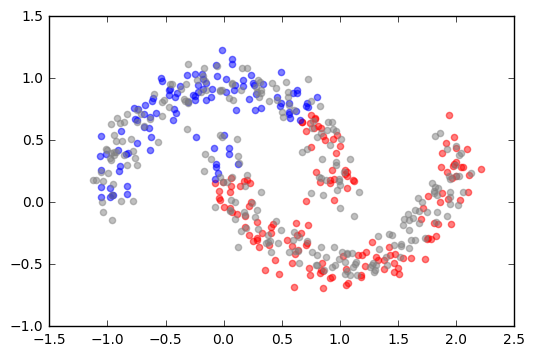

In [18]:
y_hat = [model.predict(x_i) for x_i in x_test]

X5 = [K2[0][i] for i in range(len(y_hat)) if y_hat[i]!=0]
X6 = [K2[1][i] for i in range(len(y_hat)) if y_hat[i]!=0]

X7 = [K2[0][i] for i in range(len(y_hat)) if y_hat[i]==0]
X8 = [K2[1][i] for i in range(len(y_hat)) if y_hat[i]==0]

plot.scatter(X5, X6, color='r', alpha=0.5)
plot.scatter(X7, X8, color='b', alpha=0.5)
plot.scatter(X1, X2, color='grey', alpha=0.5)
plot.scatter(X3, X4, color='grey', alpha=0.5)

print "ACC:", accuracy_score(y_hat, y_test)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
set([0, 1])
ACC: 0.964


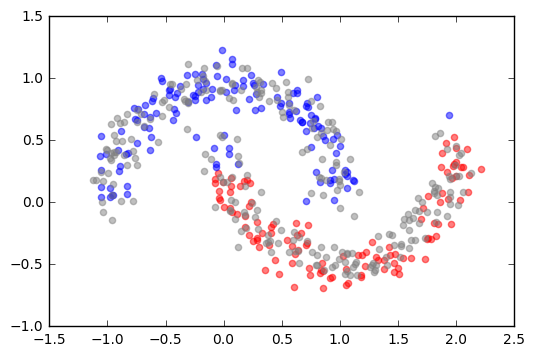

In [23]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes = (10,10,10,2), activation='relu')
print model
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
print set(y_hat)

X5 = [K2[0][i] for i in range(len(y_hat)) if y_hat[i]!=0]
X6 = [K2[1][i] for i in range(len(y_hat)) if y_hat[i]!=0]

X7 = [K2[0][i] for i in range(len(y_hat)) if y_hat[i]==0]
X8 = [K2[1][i] for i in range(len(y_hat)) if y_hat[i]==0]

plot.scatter(X5, X6, color='r', alpha=0.5)
plot.scatter(X7, X8, color='b', alpha=0.5)
plot.scatter(X1, X2, color='grey', alpha=0.5)
plot.scatter(X3, X4, color='grey', alpha=0.5)

print "ACC:", accuracy_score(y_hat, y_test)